In [1]:
import pandas as pd

df_books = pd.read_csv('books.csv',header =0)
df_ratings = pd.read_csv('ratings.csv',header = 0)
df_booktags = pd.read_csv('book_tags.csv',header =0)

In [2]:
df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
df_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
#980K ratings for 10K books from 53K users
print(df_books.shape)
print(df_ratings.shape)
print(df_booktags.shape)

(10000, 23)
(981756, 3)
(999912, 3)


In [5]:
df_ratings = df_ratings.sort_values(by=['user_id','book_id'])

In [6]:
df_ratings.head(100)

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5
959821,9762,2,4
890007,9014,3,1
893311,9049,3,1
326891,3273,4,2
346433,3469,4,5


In [7]:
import plotly
import chart_studio.plotly as py
py.sign_in('Pragyas','ozM6LIihd5uZU9GyC12o')

In [8]:
df_ratings.head()

,book_id,user_id,rating
117889,1180,1,4
488112,4893,1,3
625717,6285,1,4
796318,8034,2,4
875008,8855,2,5


In [94]:
#df_ratings['user_count']= df_ratings.groupby(['user_id'])['book_id'].transform('count')


In [9]:
df_ratings['key']=df_ratings.book_id.astype(str)+df_ratings.user_id.astype(str)

In [10]:
#deduping ratings
df_ratings = df_ratings.drop_duplicates('key',keep='first')

In [11]:

df_ratings.shape

(979310, 4)

In [12]:
df_ratings['user_count']= df_ratings.groupby(['user_id'])['book_id'].transform('count')

In [13]:
df_ratings.head()

,book_id,user_id,rating,key,user_count
117889,1180,1,4,11801,3
488112,4893,1,3,48931,3
625717,6285,1,4,62851,3
796318,8034,2,4,80342,3
875008,8855,2,5,88552,3


In [14]:
df_ratings = df_ratings.loc[df_ratings['user_count']>2]

In [15]:
df_ratings['book_id'].nunique()

10000

In [16]:
user_fraction = 0.2
users = df_ratings['user_id'].unique()
sample_users = users[0:9500]

In [17]:
df_ratings_samp = df_ratings.loc[df_ratings['user_id'].isin(sample_users)]

In [18]:
df_ratings_samp.shape

(214231, 5)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=10)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
#plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [21]:
df_ratings_samp.set_index(["rating",'user_id']).count(level="rating")

,book_id,key,user_count
rating,,,
1,4138,4138,4138
2,16929,16929,16929
3,63925,63925,63925
4,80887,80887,80887
5,48352,48352,48352


# Book Ratings

In [22]:
df_m = pd.DataFrame(df_ratings_samp['rating'].value_counts())

In [29]:
dfm =df_m.reset_index()


In [34]:
dfm.rename(columns={'index':'rt','rating':'count'})

,rt,count
0,4,80887
1,3,63925
2,5,48352
3,2,16929
4,1,4138


In [36]:
import plotly.express as px
fig = px.bar(dfm, x='index', y='rating',labels={'Complaint ID':'# of Complaints'})
fig.show()

In [37]:
df_ratings_samp.head()

,book_id,user_id,rating,key,user_count
117889,1180,1,4,11801,3
488112,4893,1,3,48931,3
625717,6285,1,4,62851,3
796318,8034,2,4,80342,3
875008,8855,2,5,88552,3


In [48]:
df_users = df_ratings_samp[['user_id','user_count']]

In [52]:
df_users = df_users.drop_duplicates(keep='first')

In [53]:
df_users.shape

(9500, 2)

In [54]:
df2=(df_users.groupby('user_count').count()[['user_id']].sort_values('user_id',ascending=False))
df3=df2.reset_index()

In [55]:
df3.head()

,user_count,user_id
0,3,1040
1,4,783
2,5,649
3,6,502
4,7,430


In [56]:
fig = px.bar(df3, x='user_count', y='user_id',labels={'Complaint ID':'# of Complaints'})
fig.show()

In [58]:
df_ratings_samp.head()

,book_id,user_id,rating,key,user_count
117889,1180,1,4,11801,3
488112,4893,1,3,48931,3
625717,6285,1,4,62851,3
796318,8034,2,4,80342,3
875008,8855,2,5,88552,3


In [66]:
mean_ur=df_ratings_samp.groupby('user_id').mean()[['rating']]
mean_ur = mean_ur.reset_index()

Text(0.5, 0, 'Average Rating')

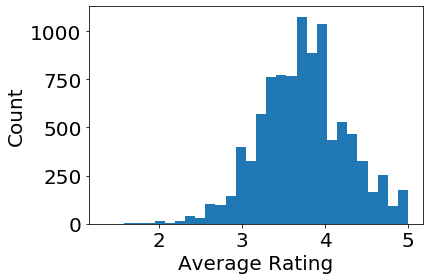

In [70]:
plt.hist(mean_ur['rating'],bins=30)
plt.ylabel('Count')
plt.xlabel('Average Rating')

In [71]:
mean_bookrating=df_ratings_samp.groupby('book_id').count()[['key']]
mean_bookrating = mean_bookrating.reset_index()

Text(0.5, 0, 'Number of Ratings per Book')

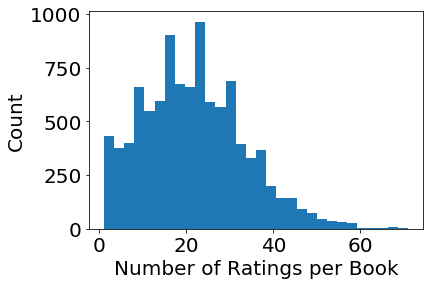

In [76]:
plt.hist(mean_bookrating['key'],bins=30)
plt.ylabel('Count')
plt.xlabel('Number of Ratings per Book')

# Book Tags

# Books Data